# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting
This project is from [Kaggle]("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview").

### Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

%matplotlib inline

Explore Data Analysis (EDA)

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

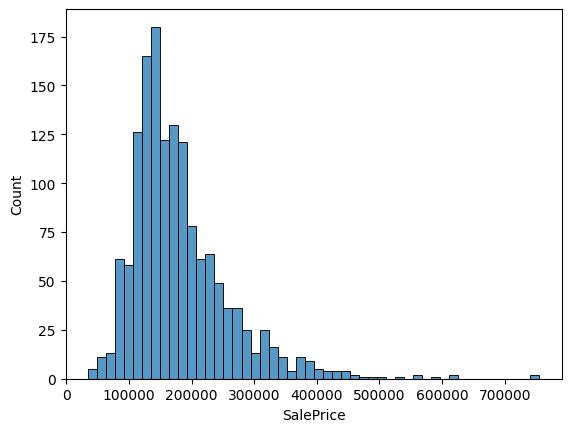

In [4]:
# check how the saleprice distribute
sns.histplot(df_train.SalePrice, bins=50)

Data cleaning

In [5]:
df_train.columns = df_train.columns.str.lower()
df_train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
# translate mssubclass column to actual names
mssubclass_values = {
    20:	"1-STORY 1946 & NEWER ALL STYLES",
    30:	"1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45:	"1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60:	"2-STORY 1946 & NEWER",
    70:	"2-STORY 1945 & OLDER",
    75:	"2-1/2 STORY ALL AGES",
    80:	"SPLIT OR MULTI-LEVEL",
    85:	"SPLIT FOYER",
    90:	"DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

df_train.mssubclass = df_train.mssubclass.map(mssubclass_values)
df_train.head(2)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
# translate OverallQual, OverallCond column to actual names
overallqual_values = {
       10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallqual = df_train.overallqual.map(overallqual_values)

overallcond_values = {
      10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallcond = df_train.overallcond.map(overallcond_values)
df_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
for c in list(df_train.dtypes[df_train.dtypes == "object"].index):
    df_train[c] = df_train[c].str.replace(" ", "_").str.lower()

df_train.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500


In [9]:
# check the numerical columns
df_train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
lotfrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
lotarea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
yearbuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
yearremodadd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
masvnrarea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
bsmtfinsf1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0
bsmtfinsf2,1460.0,47.0,161.0,0.0,0.0,0.0,0.0,1474.0
bsmtunfsf,1460.0,567.0,442.0,0.0,223.0,478.0,808.0,2336.0
totalbsmtsf,1460.0,1057.0,439.0,0.0,796.0,992.0,1298.0,6110.0


In [10]:
# dont need the id
df_train = df_train[list(df_train.columns)[1:]]
df_train

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,2-story_1945_&_older,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,corner,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,2-story_1946_&_newer,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-story_1946_&_newer,rl,62.0,7917,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,8,2007,wd,normal,175000
1456,1-story_1946_&_newer_all_styles,rl,85.0,13175,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,mnprv,NaN,0,2,2010,wd,normal,210000
1457,2-story_1945_&_older,rl,66.0,9042,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1-story_1946_&_newer_all_styles,rl,68.0,9717,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,4,2010,wd,normal,142125


In [11]:
# split the train dataset
from sklearn.model_selection import train_test_split
df_train_full, df_train_test = train_test_split(df_train, test_size=0.2, random_state=11)
df_train_train, df_train_val = train_test_split(df_train_full, test_size=0.25,random_state=11)

y_train = np.log1p(df_train_train.saleprice.values)
y_val = np.log1p(df_train_val.saleprice.values)
y_test = np.log1p(df_train_test.saleprice.values)

In [12]:
df_train_train = df_train_train.reset_index(drop=True)
df_train_val = df_train_val.reset_index(drop=True)
df_train_test = df_train_test.reset_index(drop=True)

In [13]:
# delete target value
del df_train_train["saleprice"]
del df_train_val["saleprice"]
del df_train_test["saleprice"]

In [14]:
# fill nan with 0
df_train_train = df_train_train.fillna(0)
df_train_val = df_train_val.fillna(0)

In [15]:
#encode categorical variable
dict_train = df_train_train.to_dict(orient="records")
dict_val = df_train_val.to_dict(orient="records")

In [16]:
# feature matrix
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

Decision tree model

In [17]:
# train a decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# compare rmse in train data
y_pred = dt.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"rmse: {rmse}")

rmse: 0.0


In [19]:
# compare rmse in val data
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"rmse: {rmse}")

rmse: 0.22577431644713847


In [29]:
# model is overfitting because rmse in training is 0
# let us tune the max_depth
max_depth = [1, 10, 20, 30, 40, 50, 60, 70, None]
rmse_list = []
for d in max_depth:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_list.append(rmse)
    print(f"max_depth:{d} --> rmse: {round(rmse,3)}")

max_depth:1 --> rmse: 0.324
max_depth:10 --> rmse: 0.227
max_depth:20 --> rmse: 0.223
max_depth:30 --> rmse: 0.219
max_depth:40 --> rmse: 0.233
max_depth:50 --> rmse: 0.219
max_depth:60 --> rmse: 0.23
max_depth:70 --> rmse: 0.227
max_depth:None --> rmse: 0.222


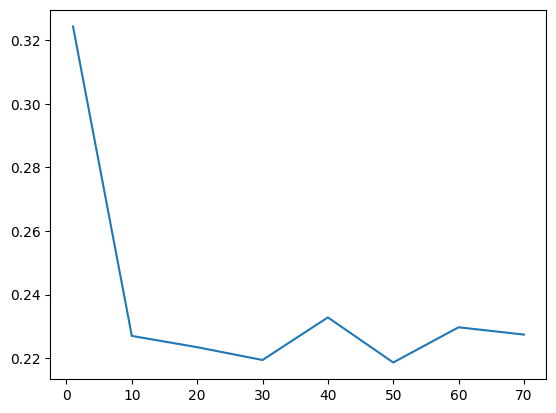

In [32]:
# plot rmse
plt.plot(max_depth, rmse_list)
plt.show()

In [ ]:
# features to split the model
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))